In [2]:
from scipy.io import wavfile
import numpy as np
import librosa
from matplotlib import pyplot as plt
from scipy.signal import correlate, find_peaks
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [3]:
data, s = librosa.load('C:/Users/kesav/OneDrive/Desktop/Academics/speech signal processing/Assignment-2/lataji_sng.wav')
length = data.shape[0]
t = length / s

Text(0.5, 1.0, 'Time domain plot')

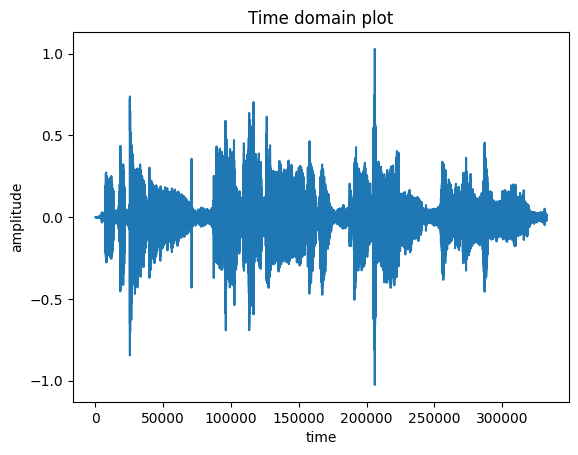

In [11]:
#time-domain plot

time = np.linspace(0, length, data.shape[0])
plt.plot(time,data)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Time domain plot')

In [4]:
frame_size = 0.020
frame_stride = 0.01

frame_length,frame_step = frame_size * s, frame_stride * s
frame_length=round(frame_length)
print(frame_length)

signal_length=len(data)
num_frames =round(signal_length/frame_length)

frame_index=[0]
temp=0

for i in range(1,num_frames):
    temp+=frame_length
    frame_index.append(temp)

441


Text(0, 0.5, 'pitch')

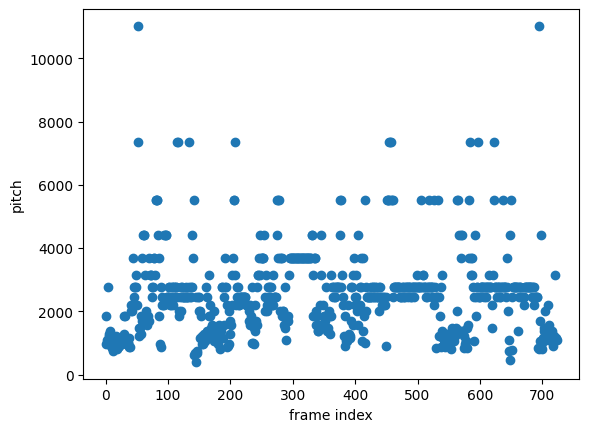

In [12]:
pitch=[]

for i in range(len(frame_index)):
    x=range(frame_index[i],frame_index[i]+frame_length)
    y=data[frame_index[i]:frame_index[i]+frame_length]
    amp_length = y.shape[0]
    time = length / s 
    auto = sm.tsa.acf(y, nlags=70)
    peaks = find_peaks(auto)[0]
    if(len(peaks)>1):
        lag = peaks[1]-peaks[0]
        pitch.append(s/ lag)
    

plt.scatter(range(len(pitch)),pitch)
plt.xlabel('frame index')
plt.ylabel('pitch')
